In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Exploratory Data Analysis

In [12]:
df = pd.read_csv("QVI_data.csv", ',')
df.head()

c:\Users\Moscha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


__COLUMN DESCRIPTION__
- LYLTY_CARD_NBR : customer ID
- DATE : transaction date
- STORE_NBR : store ID
- TXN_ID : transaction ID
- PROD_NAME : product name
- TOT_SALES : total sales
- PACK_SIZE : pack size
- BRAND : product brand
- LIFESTAGE : product lifestage
- PREMIUM_CUSTOMER : customer category

In [13]:
df.shape

(264834, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [15]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [16]:
df["DATE"] = df["DATE"].astype("datetime64")
df.dtypes

LYLTY_CARD_NBR               int64
DATE                datetime64[ns]
STORE_NBR                    int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
PACK_SIZE                    int64
BRAND                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [17]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [18]:
df.nunique()

LYLTY_CARD_NBR       72636
DATE                   364
STORE_NBR              272
TXN_ID              263125
PROD_NBR               114
PROD_NAME              114
PROD_QTY                 5
TOT_SALES              111
PACK_SIZE               21
BRAND                   21
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

CLEANING DATA OUTLIERS

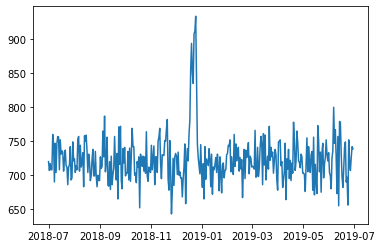

In [19]:
plt.plot(df["TXN_ID"].groupby(df["DATE"]).nunique())
plt.show()

##### Selecting Control Store
1. Create metrics 
2. Filter out stores

In [20]:
df["YEARMONTH"] = df["DATE"].dt.year.astype(str) + df["DATE"].dt.month.map("{:03}".format).astype(str)
df["YEARMONTH"] = pd.to_numeric(df["YEARMONTH"])
df["YEARMONTH"]

0         2018010
1         2018009
2         2019003
3         2019003
4         2018011
           ...   
264829    2018012
264830    2018010
264831    2018010
264832    2018010
264833    2018012
Name: YEARMONTH, Length: 264834, dtype: int64

Now, I will compute Total sales, Number of Customers, Transaction per Customers, Chips per transaction, and Average Price per Unit for each store and month by using groupby.

In [21]:
# Total Sales Sum
sales = df.groupby(["STORE_NBR","YEARMONTH"]).TOT_SALES.sum()
sales

STORE_NBR  YEARMONTH
1          2018007      206.9
           2018008      176.1
           2018009      278.8
           2018010      188.1
           2018011      192.6
                        ...  
272        2019002      395.5
           2019003      442.3
           2019004      445.1
           2019005      314.6
           2019006      312.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [22]:
# Number of Customers
customers = df.groupby(["STORE_NBR", "YEARMONTH"]).LYLTY_CARD_NBR.nunique()
customers

STORE_NBR  YEARMONTH
1          2018007      49
           2018008      42
           2018009      59
           2018010      44
           2018011      46
                        ..
272        2019002      45
           2019003      50
           2019004      54
           2019005      34
           2019006      34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [23]:
# Transaction per Customers
tpc = df.groupby(["STORE_NBR", "YEARMONTH"]).TXN_ID.nunique() / df.groupby(["STORE_NBR", "YEARMONTH"]).LYLTY_CARD_NBR.nunique()
tpc

STORE_NBR  YEARMONTH
1          2018007      1.061224
           2018008      1.023810
           2018009      1.050847
           2018010      1.022727
           2018011      1.021739
                          ...   
272        2019002      1.066667
           2019003      1.060000
           2019004      1.018519
           2019005      1.176471
           2019006      1.088235
Length: 3169, dtype: float64

In [24]:
# Number of Chips per Transaction
cpt = df.groupby(["STORE_NBR", "YEARMONTH"]).PROD_QTY.sum() / df.groupby(["STORE_NBR", "YEARMONTH"]).TXN_ID.nunique()
cpt

STORE_NBR  YEARMONTH
1          2018007      1.192308
           2018008      1.255814
           2018009      1.209677
           2018010      1.288889
           2018011      1.212766
                          ...   
272        2019002      1.895833
           2019003      1.905660
           2019004      1.909091
           2019005      1.775000
           2019006      1.891892
Length: 3169, dtype: float64

In [25]:
# Monthly store average price per unit
ppu = df.groupby(["STORE_NBR", "YEARMONTH"]).TOT_SALES.sum() / df.groupby(["STORE_NBR", "YEARMONTH"]).PROD_QTY.sum()
ppu

STORE_NBR  YEARMONTH
1          2018007      3.337097
           2018008      3.261111
           2018009      3.717333
           2018010      3.243103
           2018011      3.378947
                          ...   
272        2019002      4.346154
           2019003      4.379208
           2019004      4.239048
           2019005      4.430986
           2019006      4.458571
Length: 3169, dtype: float64

In [26]:
merged_df = [sales, customers, tpc]
df_time = pd.concat(merged_df, join='outer', axis =1)
df_time

TOT_SALES  LYLTY_CARD_NBR         0
STORE_NBR YEARMONTH                                     
1         2018007        206.9              49  1.061224
          2018008        176.1              42  1.023810
          2018009        278.8              59  1.050847
          2018010        188.1              44  1.022727
          2018011        192.6              46  1.021739
...                        ...             ...       ...
272       2019002        395.5              45  1.066667
          2019003        442.3              50  1.060000
          2019004        445.1              54  1.018519
          2019005        314.6              34  1.176471
          2019006        312.1              34  1.088235

[3169 rows x 3 columns]

In [27]:
df_time.rename(columns = {'TOT_SALES':'totSales', 'LYLTY_CARD_NBR':'nCustomers', 0:'txnUnit'}, inplace=1)
df_time.head()

totSales  nCustomers   txnUnit
STORE_NBR YEARMONTH                                
1         2018007       206.9          49  1.061224
          2018008       176.1          42  1.023810
          2018009       278.8          59  1.050847
          2018010       188.1          44  1.022727
          2018011       192.6          46  1.021739